<h1>Лабораторная работа №3</h1>
<h2><i>Обучение без учителя</i></h2>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
import matplotlib.pyplot as plt
from pandas import DataFrame

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

<h3>Ирисы</h3>

In [38]:
iris_df = datasets.load_iris()

In [39]:
iris_df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
iris_frame = DataFrame(iris_df.data)
iris_frame.columns = iris_df.feature_names
iris_frame['target'] = iris_df.target

In [41]:
type(iris_frame)
iris_frame.info()
iris_frame[~iris_frame.applymap(np.isreal).all(1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [42]:
X, Y = iris_frame.iloc[:,:-1].values, iris_frame.iloc[:,-1].values

In [43]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [44]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [45]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                    for value, name in zip(component,
                                          iris_df.feature_names)))

Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [46]:
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

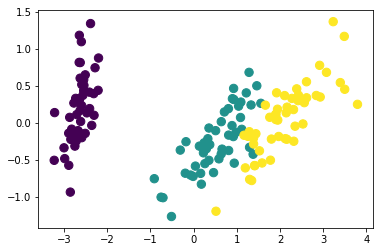

In [47]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, s=70, cmap='viridis')

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_reduced, Y, test_size = 0.2)

In [74]:
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [75]:
Y_predict = model.predict(X_test)
accuracy_score(Y_test, Y_predict)

0.9333333333333333

In [76]:
model.fit(X_train1, Y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [77]:
Y_predict = model.predict(X_test1)
accuracy_score(Y_test1, Y_predict)

0.9666666666666667

<h3>Баскетболисты</h3>

In [59]:
df_train = pd.read_csv('nba_2013.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [60]:
point_guards =df_train.copy()

In [61]:
point_guards.loc[:,'ppg'] = point_guards['pts'] / point_guards['g']

In [62]:
point_guards = point_guards[point_guards['tov'] != 0 ]

In [63]:
point_guards.loc[:,'atr'] = point_guards['ast'] / point_guards['tov'] #Assist Turnover Ratio

In [64]:
point_guards_main = point_guards[['pts', 'g', 'ppg', 'ast', 'tov', 'atr']]

In [65]:
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(point_guards_main[['ppg', 'atr']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
point_guards_main['cluster'] = kmeans.labels_

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
def visualize_clusters(df, num_clusters, iteration):
    colors = ['b', 'y', 'r', 'c', 'y', 'm']
    fig = plt.figure(figsize=(6, 6), edgecolor='k')
    ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
    for i in range(num_clusters):
        clustered_df = df[df['cluster'] == i]
        ax.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[i-1], edgecolors='g', alpha=0.6, s=150 )
        plt.xlabel('Points Per Game')
        plt.ylabel('Assist Turnover Ratio')
        plt.title('Iteration Number %s'%(iteration))

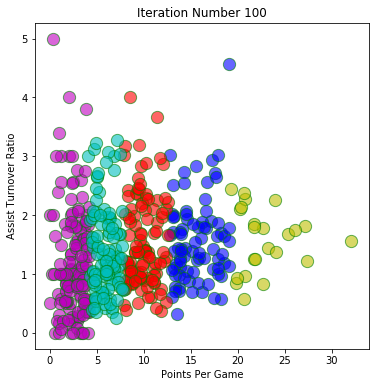

In [68]:
iteration=0
visualize_clusters(point_guards_main, 5, 100)

In [69]:
#Иерархическая кластеризация 
point_guards_clear = point_guards.drop(['player', 'pos', 'bref_team_id', 'season', 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.' ], axis = 1)
samples = point_guards_clear.values

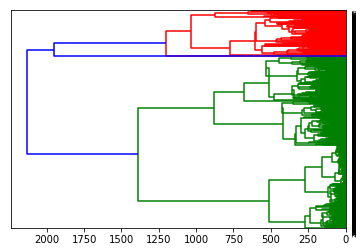

In [70]:
# Реализация иерархической кластеризации при помощи функции linkage. Строим дендрограмму, указав параметры удобные для отображения

Z = linkage(samples, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')

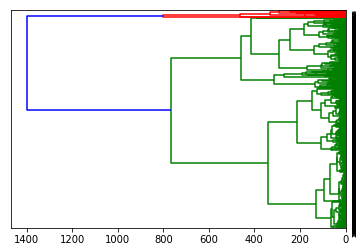

In [71]:
samples2 = point_guards_main.values

Z = linkage(samples2, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')

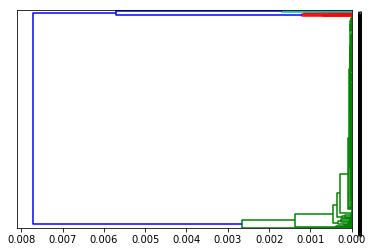

In [72]:
samples3 = point_guards_main[['ppg', 'atr']].values

Z = linkage(samples3, method='single', metric='cosine')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')